In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
accuracy_matrix = {'Naive Bayes':[],'KNN':[],'Decision Tree':[]}


Performing Naïve Bayes Classification using the Holdout method (75% train, 25% test) on the Iris dataset:

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy_matrix['Naive Bayes'].append(accuracy)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Clasification Report on the Test Data")
print(classification_report(y_test, y_pred))

Accuracy: 92.11%
Clasification Report on the Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



K-Nearest Neighbors (KNN) Classification using the Holdout method (80% train, 20% test) on the Iris dataset


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       1, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
accuracy_matrix['KNN'].append(accuracy)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 92.11%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.77      0.87        13

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



Decision Tree Classification using a 80% training & 20% test split on the Iris dataset


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
y_pred


array([0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
accuracy_matrix['Decision Tree'].append(accuracy)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 89.47%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.80      0.92      0.86        13
   virginica       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



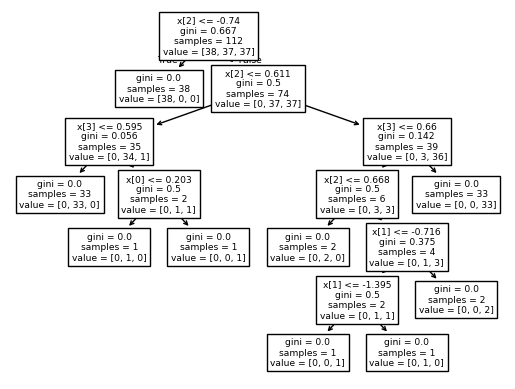

In [ ]:
from sklearn import tree
tree.plot_tree(dt_classifier)
plt.show()

Performing Naïve Bayes Classification using the Cross-Validation method(K=5) (80% train, 20% test) on the Iris dataset:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
nb_classifier = GaussianNB()

In [ ]:
cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

Cross-validation scores: [1.  0.8 0.9 1.  0.9]
Mean CV Accuracy: 0.9200


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_matrix['Naive Bayes'].append(accuracy)
print(f'Cross-Validation Accuracy (Mean of 5 Folds): {accuracy * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Accuracy (Mean of 5 Folds): 96.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Performing k-nearest Classification using the Cross-Validation method (K=5) (80% train, 20% test) on the Iris dataset:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")


knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)


Cross-validation scores: [0.95652174 0.95652174 1.         0.86363636 1.        ]
Mean CV Accuracy: 0.9553


In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)
accuracy_matrix['KNN'].append(test_accuracy)
print(f'Cross-Validation Accuracy (Mean over 5 Folds): {cv_scores.mean() * 100:.2f}%')
print(f'Test Set Accuracy: {test_accuracy * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Cross-Validation Accuracy (Mean over 5 Folds): 95.53%
Test Set Accuracy: 92.11%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.77      0.87        13

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



Performing Decision tree Classification using the Cross-Validation method (K=5) (80% train, 20% test) on the Iris dataset:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)
dt_classifier.fit(X_train, y_train)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

y_pred = dt_classifier.predict(X_test)

Cross-validation scores: [0.86956522 0.91304348 0.95454545 1.         0.90909091]
Mean CV Accuracy: 0.9292


In [ ]:
avg_cv_accuracy = cv_scores.mean()
accuracy_matrix['Decision Tree'].append(avg_cv_accuracy)
print(f'Average Cross-Validation Accuracy: {avg_cv_accuracy * 100:.2f}%')
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {test_accuracy * 100:.2f}%')
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_pred, target_names=iris.target_names))



Average Cross-Validation Accuracy: 92.92%
Test Set Accuracy: 89.47%

Classification Report on Test Set:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.80      0.92      0.86        13
   virginica       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



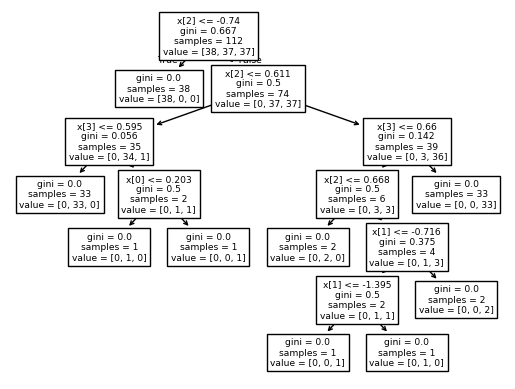

In [ ]:
from sklearn import tree
tree.plot_tree(dt_classifier)
plt.show()


Performing Naïve Bayes Classification using the Cross-Validation method (K=10) (80% train, 20% test) on the Iris dataset:



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
nb_classifier = GaussianNB()

In [ ]:
cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=10)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

Cross-validation scores: [1.  1.  1.  0.7 0.9 1.  1.  1.  0.9 0.9]
Mean CV Accuracy: 0.9400


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_matrix['Naive Bayes'].append(accuracy)
print(f'Cross-Validation Accuracy (Mean of 10 Folds): {accuracy * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Accuracy (Mean of 10 Folds): 96.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Performing k-nearest Classification using the Cross-Validation method (K=10) (80% train, 20% test) on the Iris dataset

---



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")


knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)


Cross-validation scores: [1.         0.91666667 0.90909091 1.         1.         1.
 1.         0.72727273 1.         1.        ]
Mean CV Accuracy: 0.9553


In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)
accuracy_matrix['KNN'].append(test_accuracy)
print(f'Cross-Validation Accuracy (Mean over 10 Folds): {cv_scores.mean() * 100:.2f}%')
print(f'Test Set Accuracy: {test_accuracy * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Cross-Validation Accuracy (Mean over 10 Folds): 95.53%
Test Set Accuracy: 92.11%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.77      0.87        13

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



Performing Decision tree Classification using the Cross-Validation method (K=10) (80% train, 20% test) on the Iris dataset:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=10)
dt_classifier.fit(X_train, y_train)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

y_pred = dt_classifier.predict(X_test)

Cross-validation scores: [1.         0.83333333 1.         1.         0.90909091 1.
 1.         1.         1.         0.81818182]
Mean CV Accuracy: 0.9561


In [ ]:
avg_cv_accuracy = cv_scores.mean()
accuracy_matrix['Decision Tree'].append(avg_cv_accuracy)
print(f'Average Cross-Validation Accuracy: {avg_cv_accuracy * 100:.2f}%')
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {test_accuracy * 100:.2f}%')
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_pred, target_names=iris.target_names))



Average Cross-Validation Accuracy: 95.61%
Test Set Accuracy: 89.47%

Classification Report on Test Set:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.80      0.92      0.86        13
   virginica       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



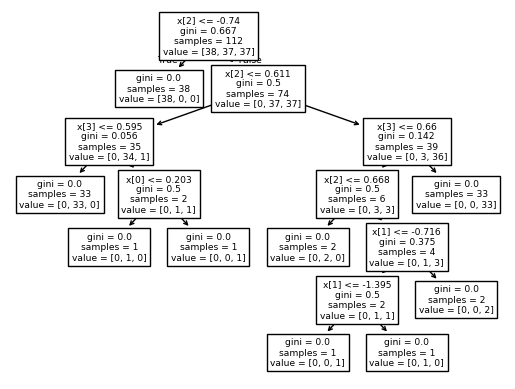

In [ ]:
from sklearn import tree
tree.plot_tree(dt_classifier)
plt.show()

In [ ]:
print("Accuracy Matrix:")
print("\t\tHold-Out   Cross-Validation(K=5)   (K=10)")
for model_name in accuracy_matrix:
    print(model_name, " : ",end=" ")
    for i in range (0,3):
        print(f"{(accuracy_matrix[model_name][i])* 100:.2f}%",end="  ")
    print("\n")



Accuracy Matrix:
		Hold-Out   Cross-Validation(K=5)   (K=10)
Naive Bayes  :  92.11%  96.00%  96.00%  

KNN  :  92.11%  92.11%  92.11%  

Decision Tree  :  89.47%  92.92%  95.61%  

